<a href="https://colab.research.google.com/github/varella/varella/blob/main/TensorFlow_Hub_Classifica%C3%A7%C3%A3o_de_Imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Hub - Classificação de Imagens

- Baseado em: https://www.tensorflow.org/hub/tutorials/tf2_image_retraining?hl=pt-br

# Importação das bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
print('Versão do TensorFlow: ', tf.__version__)
print('Versão do TensorFlow Hub: ', hub.__version__)

Versão do TensorFlow:  2.8.2
Versão do TensorFlow Hub:  0.12.0


# Configurações do modelo

In [ ]:
# Lista com os modelos disponíveis: https://tfhub.dev/s?module-type=image-feature-vector&tf-version=tf2
nome_modelo = 'efficientnetv2-xl-21k' # @param ['efficientnetv2-s', 'efficientnetv2-m', 'efficientnetv2-l', 'efficientnetv2-s-21k', 'efficientnetv2-m-21k', 'efficientnetv2-l-21k', 'efficientnetv2-xl-21k', 'efficientnetv2-b0-21k', 'efficientnetv2-b1-21k', 'efficientnetv2-b2-21k', 'efficientnetv2-b3-21k', 'efficientnetv2-s-21k-ft1k', 'efficientnetv2-m-21k-ft1k', 'efficientnetv2-l-21k-ft1k', 'efficientnetv2-xl-21k-ft1k', 'efficientnetv2-b0-21k-ft1k', 'efficientnetv2-b1-21k-ft1k', 'efficientnetv2-b2-21k-ft1k', 'efficientnetv2-b3-21k-ft1k', 'efficientnetv2-b0', 'efficientnetv2-b1', 'efficientnetv2-b2', 'efficientnetv2-b3', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'bit_s-r50x1', 'inception_v3', 'inception_resnet_v2', 'resnet_v1_50', 'resnet_v1_101', 'resnet_v1_152', 'resnet_v2_50', 'resnet_v2_101', 'resnet_v2_152', 'nasnet_large', 'nasnet_mobile', 'pnasnet_large', 'mobilenet_v2_100_224', 'mobilenet_v2_130_224', 'mobilenet_v2_140_224', 'mobilenet_v3_small_100_224', 'mobilenet_v3_small_075_224', 'mobilenet_v3_large_100_224', 'mobilenet_v3_large_075_224']

In [ ]:
links_modelos = {
  "efficientnetv2-s": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/feature_vector/2",
  "efficientnetv2-m": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_m/feature_vector/2",
  "efficientnetv2-l": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_l/feature_vector/2",
  "efficientnetv2-s-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_s/feature_vector/2",
  "efficientnetv2-m-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_m/feature_vector/2",
  "efficientnetv2-l-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_l/feature_vector/2",
  "efficientnetv2-xl-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2",
  "efficientnetv2-b0-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b0/feature_vector/2",
  "efficientnetv2-b1-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b1/feature_vector/2",
  "efficientnetv2-b2-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b2/feature_vector/2",
  "efficientnetv2-b3-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b3/feature_vector/2",
  "efficientnetv2-s-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_s/feature_vector/2",
  "efficientnetv2-m-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_m/feature_vector/2",
  "efficientnetv2-l-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_l/feature_vector/2",
  "efficientnetv2-xl-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_xl/feature_vector/2",
  "efficientnetv2-b0-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b0/feature_vector/2",
  "efficientnetv2-b1-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b1/feature_vector/2",
  "efficientnetv2-b2-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b2/feature_vector/2",
  "efficientnetv2-b3-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b3/feature_vector/2",
  "efficientnetv2-b0": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2",
  "efficientnetv2-b1": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b1/feature_vector/2",
  "efficientnetv2-b2": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b2/feature_vector/2",
  "efficientnetv2-b3": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b3/feature_vector/2",
  "efficientnet_b0": "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1",
  "efficientnet_b1": "https://tfhub.dev/tensorflow/efficientnet/b1/feature-vector/1",
  "efficientnet_b2": "https://tfhub.dev/tensorflow/efficientnet/b2/feature-vector/1",
  "efficientnet_b3": "https://tfhub.dev/tensorflow/efficientnet/b3/feature-vector/1",
  "efficientnet_b4": "https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1",
  "efficientnet_b5": "https://tfhub.dev/tensorflow/efficientnet/b5/feature-vector/1",
  "efficientnet_b6": "https://tfhub.dev/tensorflow/efficientnet/b6/feature-vector/1",
  "efficientnet_b7": "https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1",
  "bit_s-r50x1": "https://tfhub.dev/google/bit/s-r50x1/1",
  "inception_v3": "https://tfhub.dev/google/imagenet/inception_v3/feature-vector/4",
  "inception_resnet_v2": "https://tfhub.dev/google/imagenet/inception_resnet_v2/feature-vector/4",
  "resnet_v1_50": "https://tfhub.dev/google/imagenet/resnet_v1_50/feature-vector/4",
  "resnet_v1_101": "https://tfhub.dev/google/imagenet/resnet_v1_101/feature-vector/4",
  "resnet_v1_152": "https://tfhub.dev/google/imagenet/resnet_v1_152/feature-vector/4",
  "resnet_v2_50": "https://tfhub.dev/google/imagenet/resnet_v2_50/feature-vector/4",
  "resnet_v2_101": "https://tfhub.dev/google/imagenet/resnet_v2_101/feature-vector/4",
  "resnet_v2_152": "https://tfhub.dev/google/imagenet/resnet_v2_152/feature-vector/4",
  "nasnet_large": "https://tfhub.dev/google/imagenet/nasnet_large/feature_vector/4",
  "nasnet_mobile": "https://tfhub.dev/google/imagenet/nasnet_mobile/feature_vector/4",
  "pnasnet_large": "https://tfhub.dev/google/imagenet/pnasnet_large/feature_vector/4",
  "mobilenet_v2_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4",
  "mobilenet_v2_130_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/4",
  "mobilenet_v2_140_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4",
  "mobilenet_v3_small_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5",
  "mobilenet_v3_small_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_075_224/feature_vector/5",
  "mobilenet_v3_large_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5",
  "mobilenet_v3_large_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/feature_vector/5",
}

In [ ]:
pixels_modelo = {
  "efficientnetv2-s": 384,
  "efficientnetv2-m": 480,
  "efficientnetv2-l": 480,
  "efficientnetv2-b0": 224,
  "efficientnetv2-b1": 240,
  "efficientnetv2-b2": 260,
  "efficientnetv2-b3": 300,
  "efficientnetv2-s-21k": 384,
  "efficientnetv2-m-21k": 480,
  "efficientnetv2-l-21k": 480,
  "efficientnetv2-xl-21k": 512,
  "efficientnetv2-b0-21k": 224,
  "efficientnetv2-b1-21k": 240,
  "efficientnetv2-b2-21k": 260,
  "efficientnetv2-b3-21k": 300,
  "efficientnetv2-s-21k-ft1k": 384,
  "efficientnetv2-m-21k-ft1k": 480,
  "efficientnetv2-l-21k-ft1k": 480,
  "efficientnetv2-xl-21k-ft1k": 512,
  "efficientnetv2-b0-21k-ft1k": 224,
  "efficientnetv2-b1-21k-ft1k": 240,
  "efficientnetv2-b2-21k-ft1k": 260,
  "efficientnetv2-b3-21k-ft1k": 300,
  "efficientnet_b0": 224,
  "efficientnet_b1": 240,
  "efficientnet_b2": 260,
  "efficientnet_b3": 300,
  "efficientnet_b4": 380,
  "efficientnet_b5": 456,
  "efficientnet_b6": 528,
  "efficientnet_b7": 600,
  "inception_v3": 299,
  "inception_resnet_v2": 299,
  "nasnet_large": 331,
  "pnasnet_large": 331,
}

In [ ]:
caminho_modelo = links_modelos.get(nome_modelo)
caminho_modelo

'https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2'

In [ ]:
pixels = pixels_modelo.get(nome_modelo)
pixels

512

In [ ]:
tamanho_imagem = (pixels, pixels)
tamanho_imagem

(512, 512)

In [ ]:
print('Modelo utilizado: ', nome_modelo)
print('Caminho do modelo:', caminho_modelo)
print('Tamanho das imagens: ', tamanho_imagem)

Modelo utilizado:  efficientnetv2-xl-21k
Caminho do modelo: https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2
Tamanho das imagens:  (512, 512)


# Base de dados

- Kaggle: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
- TensorFlow: https://www.tensorflow.org/datasets/catalog/tf_flowers

In [ ]:
diretorio_dados = tf.keras.utils.get_file('flower_photos',
                                          'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                          untar = True)

228827136/228813984 [==============================] - 1s 0us/step


In [ ]:
diretorio_dados

'/root/.keras/datasets/flower_photos'

## Base de treinamento

In [ ]:
base_treinamento = tf.keras.preprocessing.image_dataset_from_directory(diretorio_dados,
                                                                       validation_split = .20,
                                                                       subset = 'training',
                                                                       label_mode = 'categorical',
                                                                       seed = 123,
                                                                       image_size = tamanho_imagem,
                                                                       batch_size = 1)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
2936 / 3670

0.8

In [ ]:
base_treinamento.class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
classes = base_treinamento.class_names
classes

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
tamanho_treinamento = base_treinamento.cardinality().numpy()
tamanho_treinamento

2936

In [ ]:
BATCH_SIZE = 16

In [ ]:
base_treinamento = base_treinamento.unbatch().batch(BATCH_SIZE)

In [ ]:
base_treinamento

<BatchDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [ ]:
2936 / 16

183.5

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/repeat
# https://stackoverflow.com/questions/53514495/what-does-batch-repeat-and-shuffle-do-with-tensorflow-dataset
base_treinamento = base_treinamento.repeat()

In [ ]:
# Documentação augmentation: https://www.tensorflow.org/tutorials/images/data_augmentation
camada_normalizacao = tf.keras.layers.Rescaling(1. / 255)
pre_processamento = tf.keras.Sequential([camada_normalizacao])
pre_processamento.add(tf.keras.layers.RandomRotation(40))
pre_processamento.add(tf.keras.layers.RandomTranslation(0, 0.2))
pre_processamento.add(tf.keras.layers.RandomTranslation(0.2, 0))
pre_processamento.add(tf.keras.layers.RandomZoom(0.2, 0.2))
pre_processamento.add(tf.keras.layers.RandomFlip(mode = 'horizontal'))

In [ ]:
base_treinamento = base_treinamento.map(lambda imagens, labels: (pre_processamento(imagens), labels))

In [ ]:
base_treinamento

<MapDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

## Base de teste

In [ ]:
base_teste = tf.keras.preprocessing.image_dataset_from_directory(diretorio_dados,
                                                                 validation_split = .20,
                                                                 subset = 'validation',
                                                                 label_mode = 'categorical',
                                                                 seed = 123,
                                                                 image_size = tamanho_imagem,
                                                                 batch_size = 1)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
tamanho_teste = base_teste.cardinality().numpy()
tamanho_teste

734

In [ ]:
base_teste = base_teste.unbatch().batch(BATCH_SIZE)
base_teste = base_teste.map(lambda imagens, labels: (camada_normalizacao(imagens), labels))

# Construção e treinamento da rede neural

In [ ]:
tamanho_imagem + (3,)

(512, 512, 3)

In [ ]:
caminho_modelo

'https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2'

In [ ]:
len(classes)

5

In [ ]:
# Dropout: https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf
modelo = tf.keras.Sequential([
                              tf.keras.layers.InputLayer(input_shape = tamanho_imagem + (3,)),
                              hub.KerasLayer(caminho_modelo, trainable=False),
                              tf.keras.layers.Dropout(rate = 0.2),
                              tf.keras.layers.Dense(len(classes))
])

In [ ]:
(None,) + tamanho_imagem + (3,)

(None, 512, 512, 3)

In [ ]:
modelo.build((None,) + tamanho_imagem + (3,))
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              207615832 
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 207,622,237
Trainable params: 6,405
Non-trainable params: 207,615,832
_________________________________________________________________


In [ ]:
modelo.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

In [ ]:
steps_per_epoch = tamanho_treinamento // BATCH_SIZE
validation_steps = tamanho_teste // BATCH_SIZE
print(steps_per_epoch, validation_steps)

183 45


In [ ]:
hist = modelo.fit(base_treinamento, epochs = 5, steps_per_epoch=steps_per_epoch,
                  validation_data = base_teste, validation_steps=validation_steps).history

Epoch 1/5
183/183 [==============================] - 634s 3s/step - loss: 0.4998 - accuracy: 0.8309 - val_loss: 0.1269 - val_accuracy: 0.9625
Epoch 2/5
183/183 [==============================] - 591s 3s/step - loss: 0.1921 - accuracy: 0.9346 - val_loss: 0.1169 - val_accuracy: 0.9653
Epoch 3/5
183/183 [==============================] - 589s 3s/step - loss: 0.1500 - accuracy: 0.9459 - val_loss: 0.1041 - val_accuracy: 0.9681
Epoch 4/5
183/183 [==============================] - 588s 3s/step - loss: 0.1459 - accuracy: 0.9473 - val_loss: 0.1068 - val_accuracy: 0.9722
Epoch 5/5
183/183 [==============================] - 594s 3s/step - loss: 0.1147 - accuracy: 0.9606 - val_loss: 0.1049 - val_accuracy: 0.9694


In [ ]:
hist

{'accuracy': [0.8309426307678223,
  0.9345890283584595,
  0.9458904266357422,
  0.9472602605819702,
  0.960616409778595],
 'loss': [0.4997989237308502,
  0.19211579859256744,
  0.1500129997730255,
  0.1458936631679535,
  0.11470239609479904],
 'val_accuracy': [0.9624999761581421,
  0.9652777910232544,
  0.9680555462837219,
  0.9722222089767456,
  0.9694444537162781],
 'val_loss': [0.12688226997852325,
  0.1168556958436966,
  0.10411714017391205,
  0.10679801553487778,
  0.10494551062583923]}

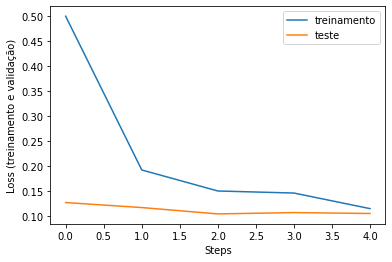

In [ ]:
plt.figure()
plt.ylabel('Loss (treinamento e validação)')
plt.xlabel('Steps')
plt.plot(hist['loss'], label = 'treinamento')
plt.plot(hist['val_loss'], label = 'teste')
plt.legend();

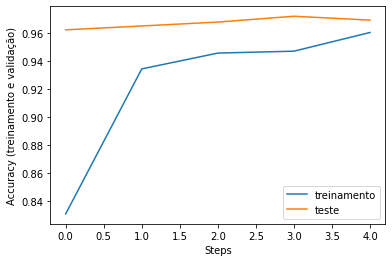

In [ ]:
plt.figure()
plt.ylabel('Accuracy (treinamento e validação)')
plt.xlabel('Steps')
plt.plot(hist['accuracy'], label = 'treinamento')
plt.plot(hist['val_accuracy'], label = 'teste')
plt.legend();

# Testes com imagens

In [ ]:
X, y = next(iter(base_teste))

In [ ]:
X

In [ ]:
X.shape

TensorShape([16, 512, 512, 3])

In [ ]:
y

<tf.Tensor: shape=(16, 5), dtype=float32, numpy=
array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
y.shape

TensorShape([16, 5])

In [ ]:
imagem = X[0, :, :, :]
imagem

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[0.04313726, 0.0627451 , 0.04705883],
        [0.04142157, 0.05416667, 0.04877451],
        [0.04093137, 0.04460784, 0.05245098],
        ...,
        [0.01151961, 0.01151961, 0.04387255],
        [0.01397059, 0.01838235, 0.0254902 ],
        [0.01568628, 0.02352941, 0.01176471]],

       [[0.05508579, 0.07389706, 0.06378677],
        [0.04709712, 0.06009115, 0.0536535 ],
        [0.03819317, 0.04346278, 0.04179688],
        ...,
        [0.01306296, 0.0146561 , 0.03496094],
        [0.01377145, 0.01798407, 0.02210478],
        [0.01409314, 0.02034314, 0.01256128]],

       [[0.08265932, 0.09963236, 0.10238972],
        [0.06019455, 0.07376303, 0.06491268],
        [0.03187424, 0.04082032, 0.01721048],
        ...,
        [0.01662454, 0.02189415, 0.01439568],
        [0.01331189, 0.01706495, 0.01429228],
        [0.01041667, 0.0129902 , 0.01439951]],

       ...,

       [[0.02218137, 0.03002451, 0.02702206],
        [0.02

In [ ]:
y_true = np.argmax(y[0])
y_true

2

In [ ]:
classes[y_true]

'roses'

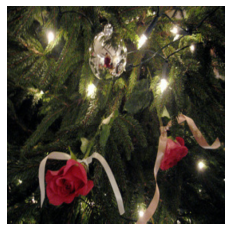

In [ ]:
plt.imshow(imagem)
plt.axis('off');

In [ ]:
imagem.shape

TensorShape([512, 512, 3])

In [ ]:
imagem = np.expand_dims(imagem, axis = 0)
imagem.shape

(1, 512, 512, 3)

In [ ]:
previsao = modelo.predict(imagem)
previsao

array([[-5.791305 , -6.0681376, -9.125044 ,  9.323482 , -7.560396 ]],
      dtype=float32)

In [ ]:
previsao = np.argmax(previsao)
previsao

3

In [ ]:
print('Classe correta: ', classes[y_true])
print('Previsão: ', classes[previsao])

Classe correta:  sunflowers
Previsão:  sunflowers


In [ ]:
modelo.save('/content/model')

INFO:tensorflow:Assets written to: /content/model/assets


INFO:tensorflow:Assets written to: /content/model/assets


In [ ]:
modelo_carregado = tf.keras.models.load_model('/content/model')

In [ ]:
modelo_carregado.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              207615832 
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 207,622,237
Trainable params: 6,405
Non-trainable params: 207,615,832
_________________________________________________________________


In [ ]:
previsao = classes[np.argmax(modelo_carregado.predict(imagem))]
print('Classe correta: ', classes[y_true])
print('Previsão: ', previsao)

Classe correta:  roses
Previsão:  roses
